In [193]:
import pandas as pd 
import datetime as dt
import csv

industrial_consumers = pd.read_csv("D:\Study Material\DS Proejct\ds_proj-master\energy_industrial.csv")

#converting 'DateTime' column into datatype Date. 
industrial_consumers['DateTime'] =  pd.to_datetime(industrial_consumers['DateTime'], format='%Y-%m-%d')
#Selecting only Date from DateTime column, leaving the time.
industrial_consumers['Date'] = pd.to_datetime(industrial_consumers['DateTime'].dt.date)

In [194]:
industrial_consumers['Week'] = industrial_consumers['Date'].apply(lambda x: x.week)
industrial_consumers['Month'] = industrial_consumers['Date'].apply(lambda x: x.month)
industrial_consumers['Year'] = industrial_consumers['Date'].apply(lambda x: x.year)

In [195]:
#calculating daily consumption 
daily_consumption = industrial_consumers.groupby('Date')['Demand/Usage'].sum().reset_index()[['Date', 'Demand/Usage']]
print(daily_consumption)

daily_consumption.to_csv("daily_consumption.csv", sep="\t")

          Date  Demand/Usage
0   2017-05-18      60698.16
1   2017-05-19      19563.12
2   2017-05-20       3745.44
3   2017-05-21       4529.52
4   2017-05-22      52850.88
5   2017-05-23      58942.08
6   2017-05-24      56641.68
7   2017-05-25      18876.24
8   2017-05-26       9480.24
9   2017-05-27       3272.40
10  2017-05-28       2397.60
11  2017-05-29       5132.16
12  2017-05-30      51464.16
13  2017-05-31      62557.92
14  2017-06-01      62946.72
15  2017-06-02      20768.40
16  2017-06-03       4315.68
17  2017-06-04       4736.88
18  2017-06-05      48697.20
19  2017-06-06      58631.04
20  2017-06-07      64450.08
21  2017-06-08      20956.32
22  2017-06-09      10575.36
23  2017-06-10       3278.88
24  2017-06-11       4795.20
25  2017-06-12      50375.52
26  2017-06-13      56155.68
27  2017-06-14      60873.12
28  2017-06-15      69031.44
29  2017-06-16      23418.72
..         ...           ...
336 2018-04-19      67003.20
337 2018-04-20      27676.08
338 2018-04-21

In [196]:

weekly_consumption = industrial_consumers.groupby([(industrial_consumers.Week)])['Demand/Usage'].sum().reset_index()[['Week', 'Demand/Usage']]
print(weekly_consumption)
#one issue which is to be solved: it calculates from week 1 instead of week 20 of 2017 (2017-05-18 is week 20)

weekly_consumption.to_csv("weekly_consumption.csv", sep="\t")

    Week  Demand/Usage
0      1     170255.52
1      2     287912.88
2      3     278257.68
3      4     224013.60
4      5     297613.44
5      6     279346.32
6      7     238496.40
7      8     300160.08
8      9     280875.60
9     10     276093.36
10    11     284860.80
11    12     236183.04
12    13     237441.70
13    14     298825.20
14    15     231996.96
15    16     282061.44
16    17     221160.35
17    18     208649.52
18    19     325869.32
19    20     341236.80
20    21     202461.12
21    22     211921.92
22    23     211384.08
23    24     268142.40
24    25     220566.24
25    26     285858.72
26    27      58669.92
27    28     259919.28
28    29     219438.72
29    30     260191.44
30    31     213483.60
31    32     205565.04
32    33     207094.32
33    34     259148.16
34    35     194212.08
35    36     200854.08
36    37     254035.44
37    38     235275.84
38    39     206122.32
39    40     270131.76
40    41     212699.52
41    42     215181.36
42    43   

In [197]:
#calculating monthly consumption while taking into account both the month and year. Kept May 2017 and May 2018 separate. 
monthly_consumption=industrial_consumers.groupby([(industrial_consumers.Month),(industrial_consumers.Year)]).sum().reset_index()[['Month','Year', 'Demand/Usage']].sort_values(["Year"])
print(monthly_consumption)

monthly_consumption.to_csv("monthly_consumption.csv", sep="\t")


    Month  Year  Demand/Usage
4       5  2017     410151.60
6       6  2017    1066744.08
7       7  2017     863628.48
8       8  2017    1011489.12
9       9  2017     906098.40
10     10  2017    1092612.24
11     11  2017     973477.44
12     12  2017     869985.36
0       1  2018    1150310.16
1       2  2018    1107276.48
2       3  2018    1125193.68
3       4  2018    1073592.93
5       5  2018     756400.52


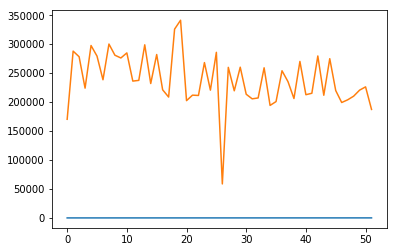

In [198]:
import matplotlib.pyplot as plt
plt.plot(weekly_consumption)
plt.show()

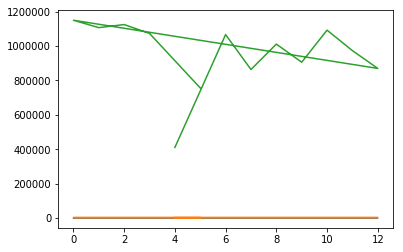

In [199]:
plt.plot(monthly_consumption)
plt.show()

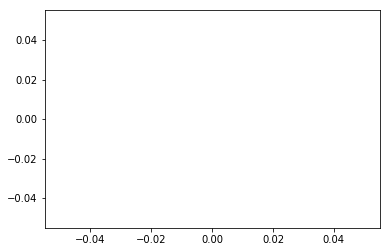